In [ ]:
# make ploting inline of jupyter notebook
%matplotlib inline

In [1]:
# import related libraries
from obspy import read, UTCDateTime, read_inventory, read_events
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np

In [2]:
def mpl_plot(stream, figsize=[12.0, 8.0], linewidth=1):
    if len(stream)==1:
        fig, ax = plt.subplots(nrows=len(stream), ncols=1, figsize=figsize)
        ax.plot(stream[0].times("matplotlib"), stream[0].data, "k-", linewidth=linewidth, label=stream[0].stats.station+'.'+stream[0].stats.channel)
        ax.legend(loc=2)
    else:
        fig, ax = plt.subplots(nrows=len(stream), ncols=1, figsize=figsize)
        for i, tr in zip(range(0,len(stream)), stream):
            ax[i].plot(tr.times("matplotlib"), tr.data, "k-", linewidth=linewidth, label=tr.stats.station+'.'+tr.stats.channel)
            ax[i].legend(loc=2)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


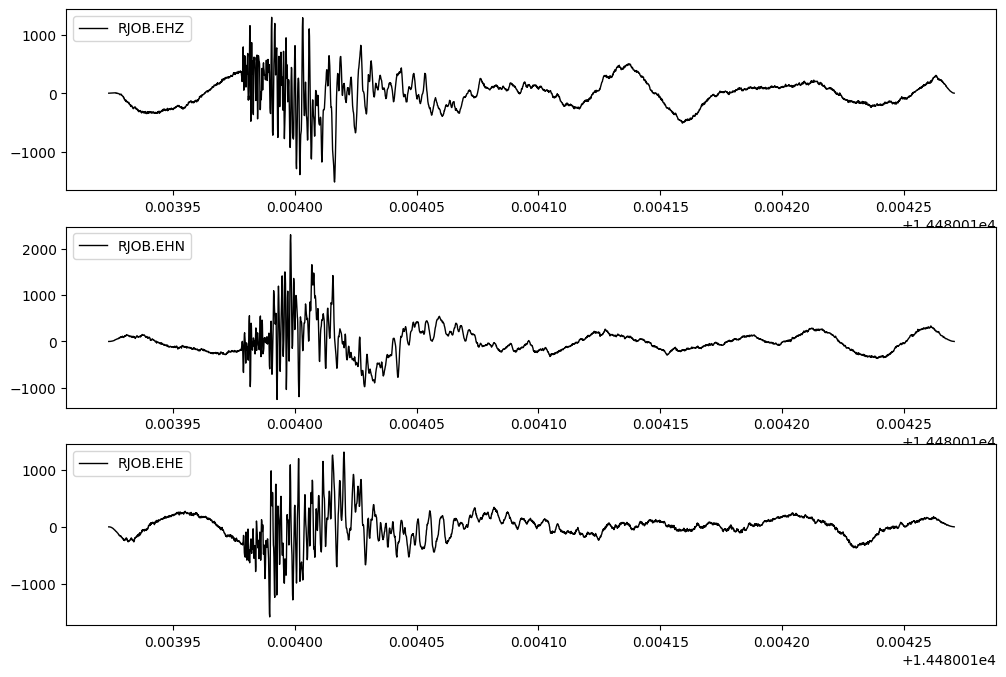

In [3]:
# Stream object
st = read()
print(st)
mpl_plot(st, figsize=[12.0, 8.0], linewidth=1)
#st.plot()

In [4]:
# Trace
tr = st[0]
print(tr)

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


In [5]:
# Stats
print(tr.stats)

         network: BW
         station: RJOB
        location: 
         channel: EHZ
       starttime: 2009-08-24T00:20:03.000000Z
         endtime: 2009-08-24T00:20:32.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3000
           calib: 1.0
    back_azimuth: 100.0
     inclination: 30.0
        response: Channel Response
	From M/S (Velocity in Meters Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 2.5168e+09 defined at 0.020 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.67785e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1


In [6]:
# Actual data
print(tr.data)

[0.         0.00694644 0.07597424 ... 1.93449584 0.98196204 0.44196924]


In [9]:
# Filtering

st_filtered_bp = st.copy()
st_filtered_low = st.copy()
st_filtered_high = st.copy()

st_filtered_bp.filter('bandpass', freqmin=1.0, freqmax=10.0)
st_filtered_high.filter('highpass', freq=20.0)
st_filtered_low.filter('lowpass', freq=1.0)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

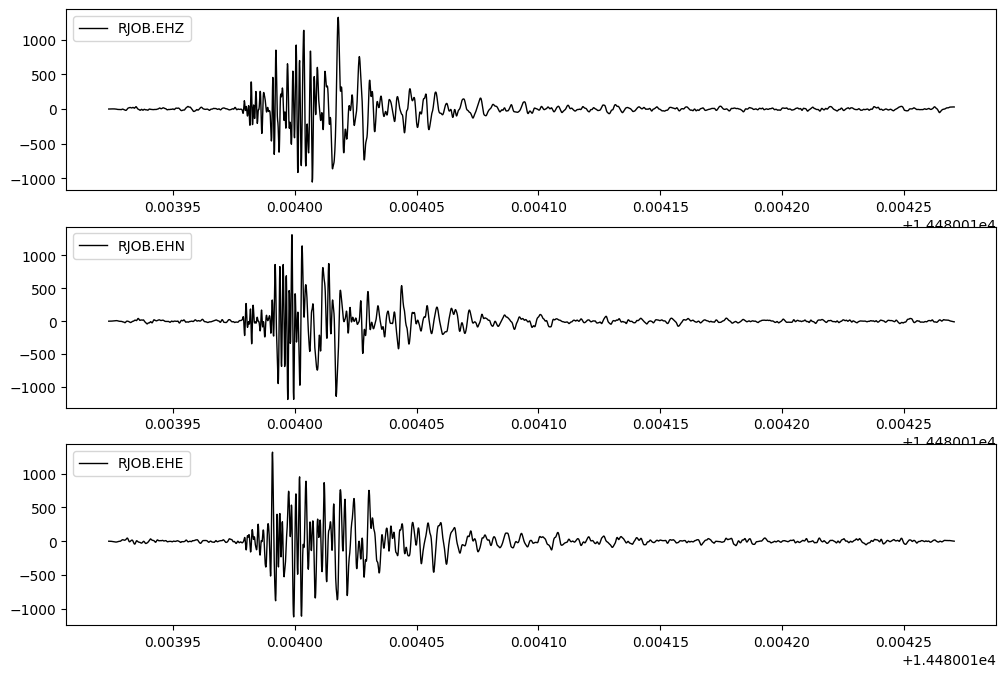

In [12]:
mpl_plot(st_filtered_bp, figsize=[12.0, 8.0], linewidth=1)

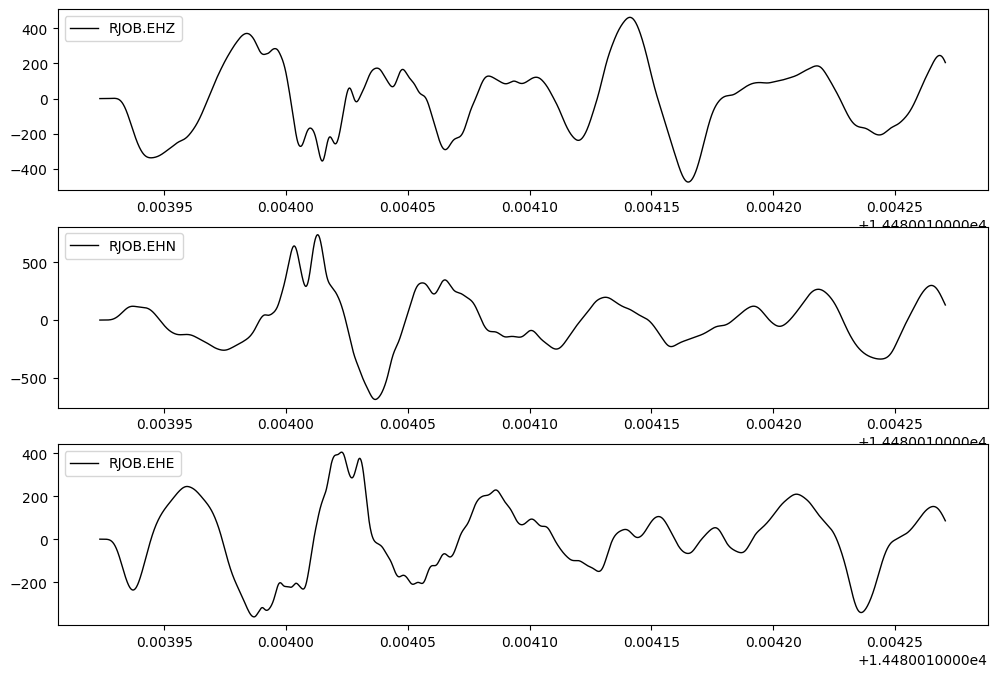

In [10]:
mpl_plot(st_filtered_low, figsize=[12.0, 8.0], linewidth=1)

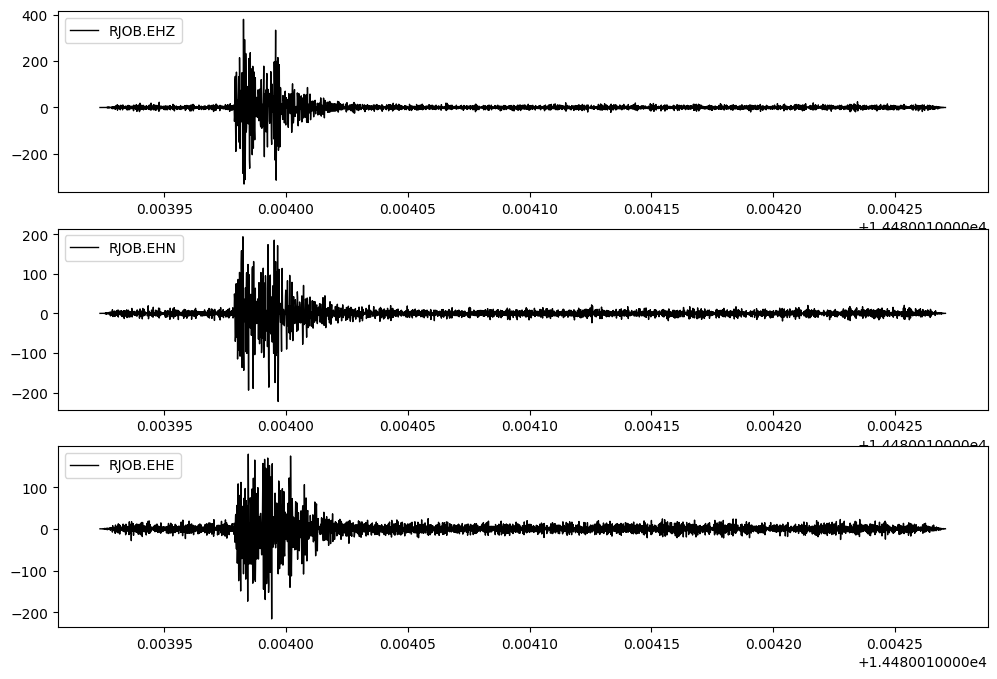

In [11]:
mpl_plot(st_filtered_high, figsize=[12.0, 8.0], linewidth=1)

/Users/blaz/.pyenv/versions/3.9.7/envs/tides/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (4.0) of bandpass is at or above Nyquist (2.5). Applying a high-pass instead.
  warnings.warn(msg)


3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.800000Z | 5.0 Hz, 150 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.800000Z | 5.0 Hz, 150 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.800000Z | 5.0 Hz, 150 samples


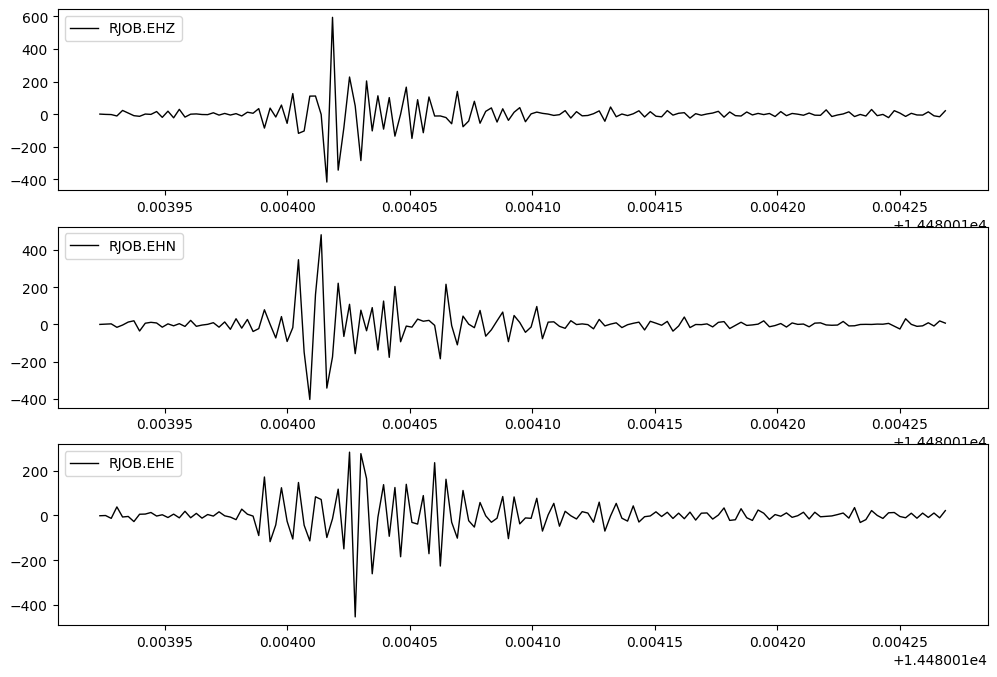

In [13]:
# Resampling
st_resample = st.copy().resample(sampling_rate=5.0).filter('bandpass', freqmin=1.0, freqmax=4.0)
print(st_resample)
mpl_plot(st_resample, figsize=[12.0, 8.0], linewidth=1)

In [14]:
# StaXML
inv = read_inventory()
print(inv)

Inventory created at 2014-03-03T11:07:06.198000Z
	Created by: fdsn-stationxml-converter/1.0.0
		    http://www.iris.edu/fdsnstationconverter
	Sending institution: Erdbebendienst Bayern
	Contains:
		Networks (2):
			BW, GR
		Stations (5):
			BW.RJOB (Jochberg, Bavaria, BW-Net) (3x)
			GR.FUR (Fuerstenfeldbruck, Bavaria, GR-Net)
			GR.WET (Wettzell, Bavaria, GR-Net)
		Channels (30):
			BW.RJOB..EHZ (3x), BW.RJOB..EHN (3x), BW.RJOB..EHE (3x), 
			GR.FUR..BHZ, GR.FUR..BHN, GR.FUR..BHE, GR.FUR..HHZ, GR.FUR..HHN, 
			GR.FUR..HHE, GR.FUR..LHZ, GR.FUR..LHN, GR.FUR..LHE, GR.FUR..VHZ, 
			GR.FUR..VHN, GR.FUR..VHE, GR.WET..BHZ, GR.WET..BHN, GR.WET..BHE, 
			GR.WET..HHZ, GR.WET..HHN, GR.WET..HHE, GR.WET..LHZ, GR.WET..LHN, 
			GR.WET..LHE


In [15]:
sta = inv[0][0]
print(sta)
print(sta.latitude, sta.longitude, sta.elevation)

Station FUR (Fuerstenfeldbruck, Bavaria, GR-Net)
	Station Code: FUR
	Channel Count: None/None (Selected/Total)
	2006-12-16T00:00:00.000000Z - 
	Access: None 
	Latitude: 48.1629, Longitude: 11.2752, Elevation: 565.0 m
	Available Channels:
	    ..HH[ZNE]   100.0 Hz  2006-12-16 to None
	    ..BH[ZNE]    20.0 Hz  2006-12-16 to None
	    ..LH[ZNE]     1.0 Hz  2006-12-16 to None
	    ..VH[ZNE]     0.1 Hz  2006-12-16 to None

48.162899 11.2752 565.0


In [15]:
chan = inv[0][0][0]
print(chan)

Channel 'HHZ', Location '' 
	Time range: 2006-12-16T00:00:00.000000Z - --
	Latitude: 48.16, Longitude: 11.28, Elevation: 565.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Channel types: TRIGGERED, GEOPHYSICAL
	Sampling Rate: 100.00 Hz
	Sensor (Description): Streckeisen STS-2/N seismometer (None)
	Response information available


No handles with labels found to put in legend.


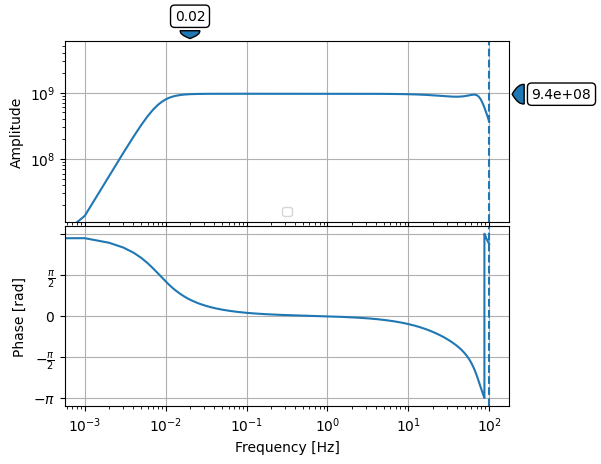

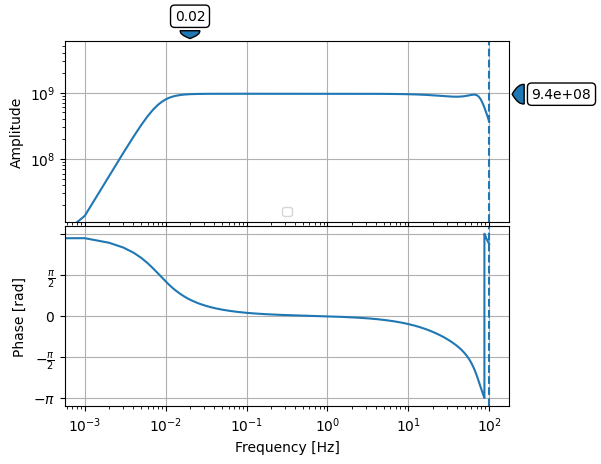

In [16]:
hhz_resp = chan.response
hhz_resp.plot(min_freq=0.001)

1 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


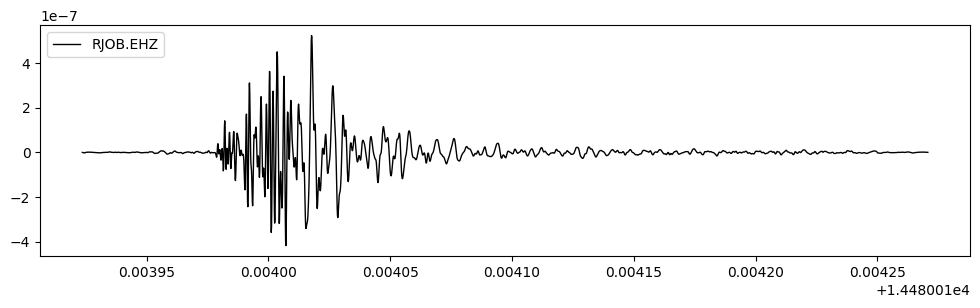

In [16]:
st_resp = st.copy().select(channel='EHZ')
print(st_resp)
st_resp.remove_response(output="VEL", zero_mean=True, taper=True, taper_fraction=0.5).filter('bandpass', freqmin=1, freqmax=10)
mpl_plot(st_resp, figsize=[12.0, 3.0], linewidth=1)

In [18]:
# QuakeML

events = read_events()
#print(events)
#events.plot('local')
event = events[0]
print(event)
#for mag in event.magnitudes:
#    print(mag)

Event:	2012-04-04T14:21:42.300000Z | +41.818,  +79.689 | 4.4 mb | manual

	            resource_id: ResourceIdentifier(id="quakeml:eu.emsc/event/20120404_0000041")
	             event_type: 'not reported'
	          creation_info: CreationInfo(agency_uri=ResourceIdentifier(id="smi:smi-registry/organization/EMSC"), author_uri=ResourceIdentifier(id="smi:smi-registry/organization/EMSC"), creation_time=UTCDateTime(2012, 4, 4, 16, 40, 50), version='1.0.1')
	    preferred_origin_id: ResourceIdentifier(id="quakeml:eu.emsc/origin/rts/261020/782484")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:eu.emsc/NetworkMagnitude/rts/261020/782484/796646")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements
